The input features are as follows:

fixed acidity - most acids involved with wine or fixed or nonvolatile (do not evaporate readily);

volatile acidity - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste;

citric acid - found in small quantities, citric acid can add ‘freshness’ and flavor to wines;

residual sugar - the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet;

chlorides - the amount of salt in the wine;

free sulfur dioxide - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine;

total sulfur dioxide - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine;

density - the density of water is close to that of water depending on the percent alcohol and sugar content;

pH - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale;

sulphates - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

alcohol - the percent alcohol content of the wine;

The output feature is:

quality - output variable (based on sensory data, score between 0 and 10);

In [19]:
install.packages('corrplot')
install.packages('reshape2')
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”


In [2]:
#Libraries needed
library(ggplot2)
library(corrplot)
library(reshape2)
library(dplyr)
library(tidyverse)


corrplot 0.92 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.1     ✔ purrr   1.0.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
data = read.csv('winequality-red.csv')

In [ ]:
head(data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [ ]:
str(data)


'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


In [ ]:
summary(data)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [ ]:
# Column names
names(data)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"

In [ ]:
# Number of rows
nrow(data)

[1] 1599

In [ ]:
# What are dataset dimensions
dim(data)

[1] 1599   12

In [ ]:
#Let us check if we have any NA values in our data.
#If FALSE means no NA data in our data.frame
#If TRUE we will check each column and for NA data.

any(is.na.data.frame(data))

[1] FALSE

In [ ]:
# Which are the wine qualities for which data is available?
# Levels of the quality in wine 
unique(data$quality)

[1] 5 6 7 4 8 3

In [5]:
#Transforming Quality from an Integer to a Factor
data$quality <- factor(data$quality, ordered = T)

In [7]:
#Creating a new Factored Variable called 'Rating'

data$rating <- ifelse(data$quality < 5, 'bad', ifelse(
  data$quality < 7, 'average', 'good'))

data$rating <- ordered(data$rating,
                       levels = c('bad', 'average', 'good'))

In [9]:
head(data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,rating
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<ord>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,average
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,average
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,average
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,average
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,average
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,average


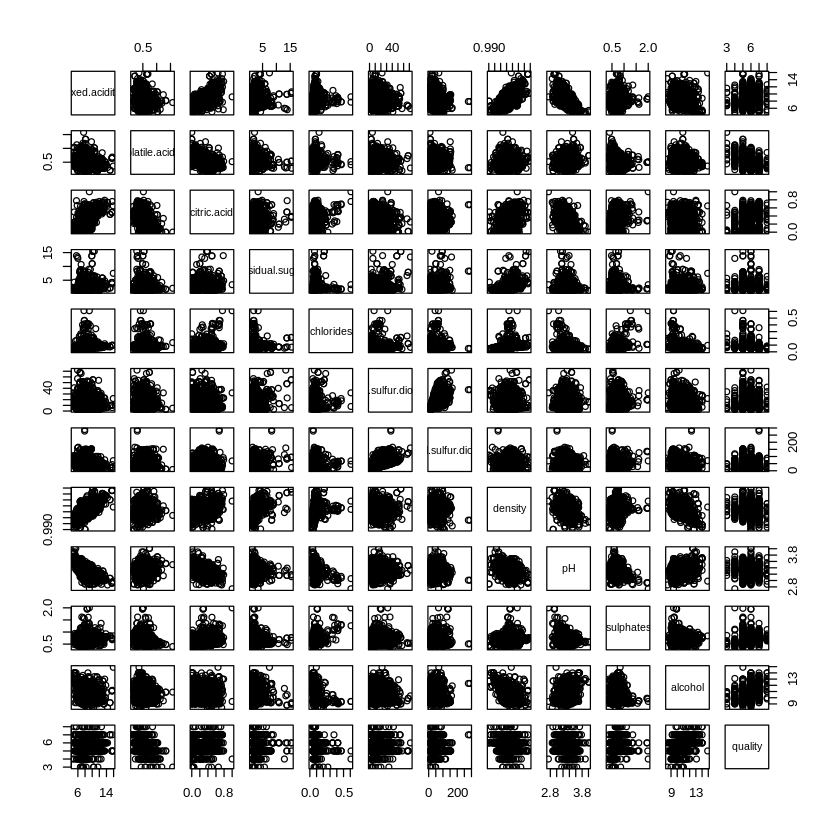

In [ ]:
#Scatterplot Matrix of Variables
plot(data)

In [15]:
install.packages("GGally")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape’




Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better valu

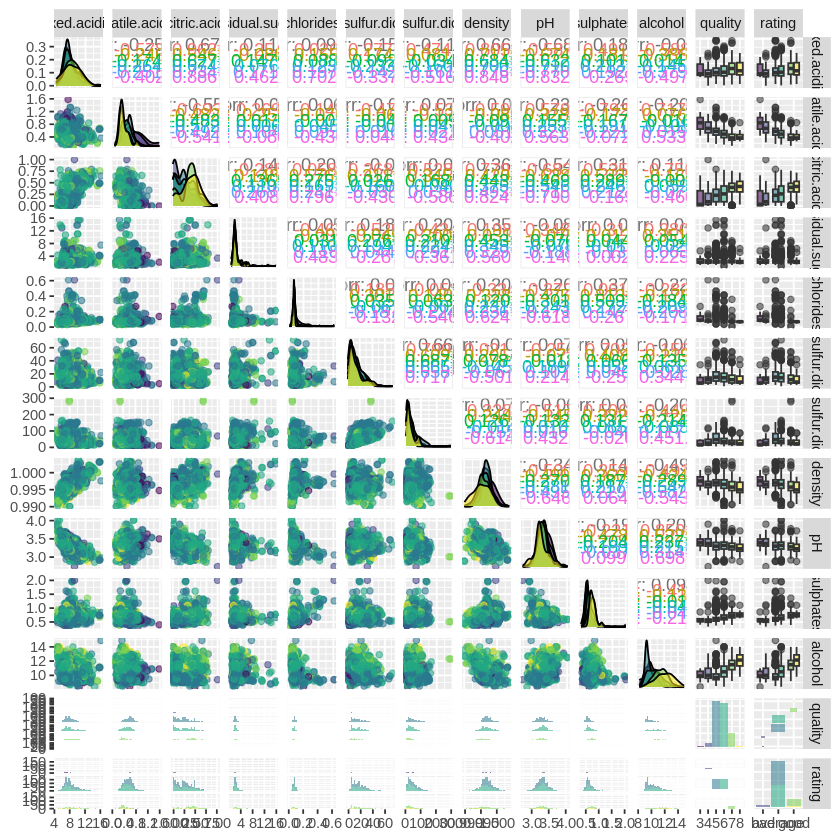

In [16]:
library(GGally)

data$quality = as.factor(data$quality)
ggpairs(data, aes(colour = quality, alpha = 0.4))

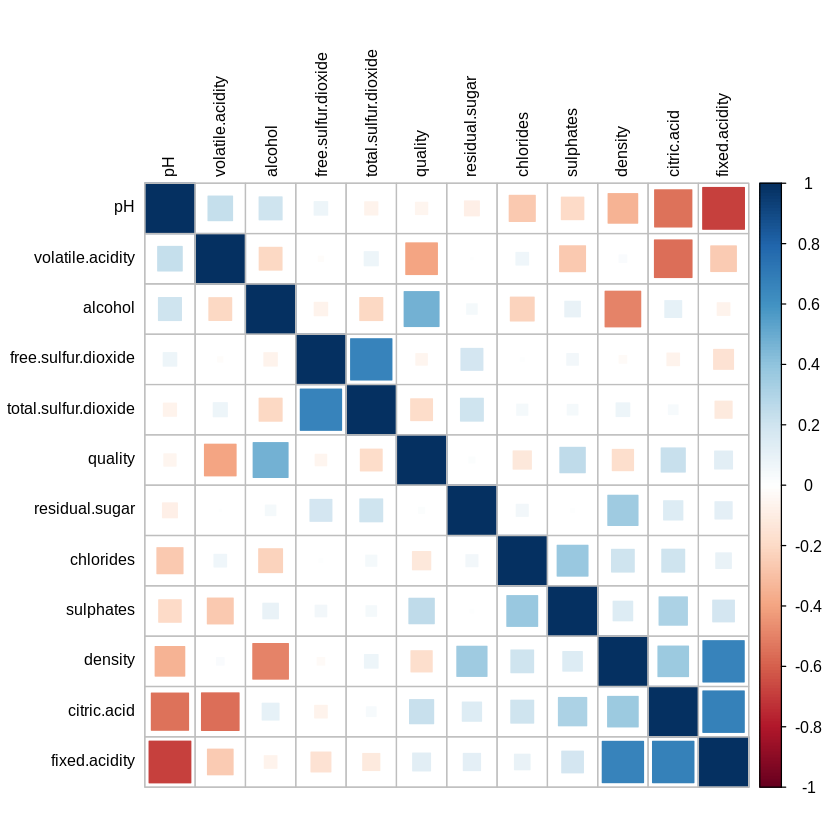

In [18]:
nc=ncol(data)
df <- data[,1:11]
df$quality <- as.integer(data[,12])
correlations <- cor(df,method="pearson")
corrplot(correlations, number.cex = .9, method = "square", 
         hclust.method = "ward", order = "FPC",
         type = "full", tl.cex=0.8,tl.col = "black")

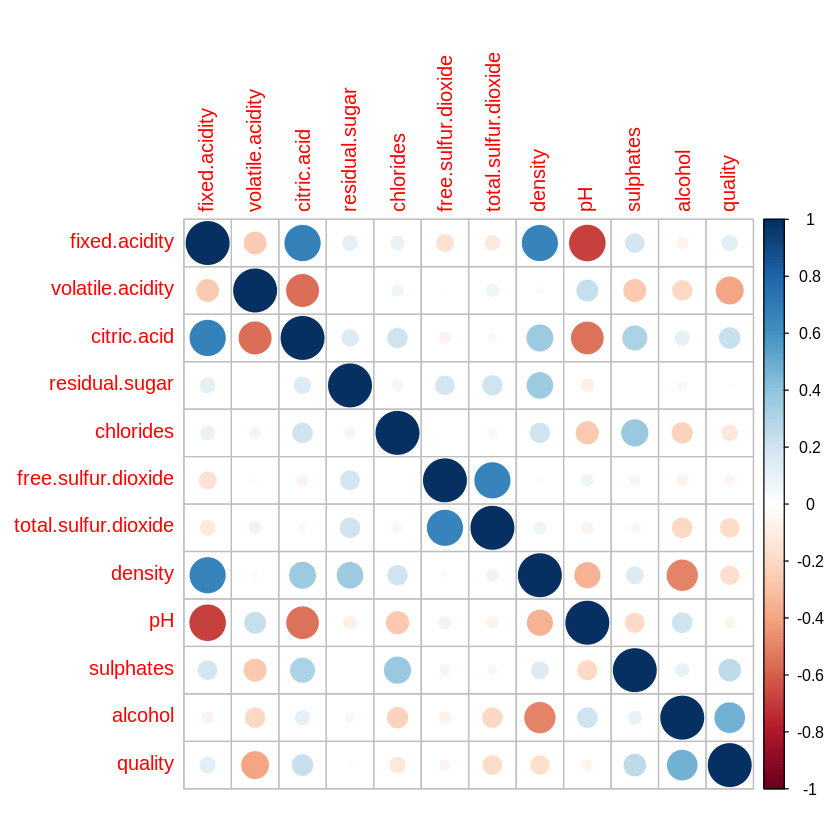

In [ ]:
#Correlation Heatmap of Variables
corrplot(cor(data))

The following dimmensions are relatively highly correlated:

total.sulfur.dioxide with free.sulfur.dioxide;
fixed.acidity with density and citric.acid;


The following dimmensions are relatively correlated:

alcohol with quality (this might be a candidate for drop, since might be a leak);

The following dimmensions are relativelly highly inverse correlated:

fixed.acidity with pH;

The following dimmensions are relatively inverse correlated:

citric.acid with pH and volatile.acidity;

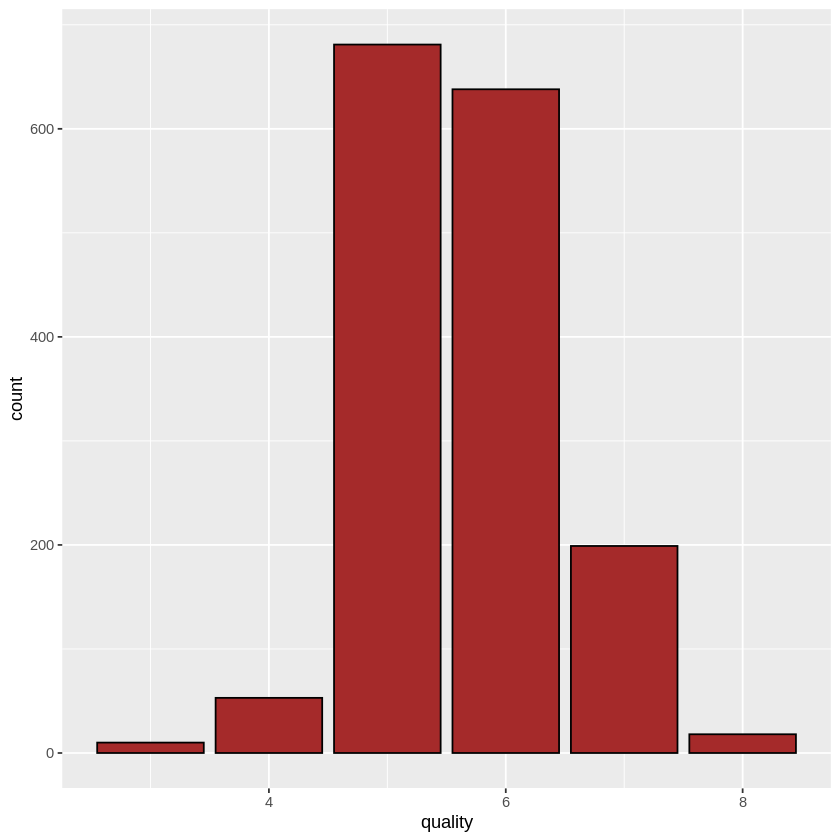

In [ ]:
ggplot(aes(quality), data = data) +
  geom_bar(color = "black", fill = "brown")

Most wine samples are of 5 and 6 (almost 80% of the dataset). Moreover, it seems to be that wines which received the highest score (8) have a few observations, and this situation repeats in the lowest level( 3, 4).

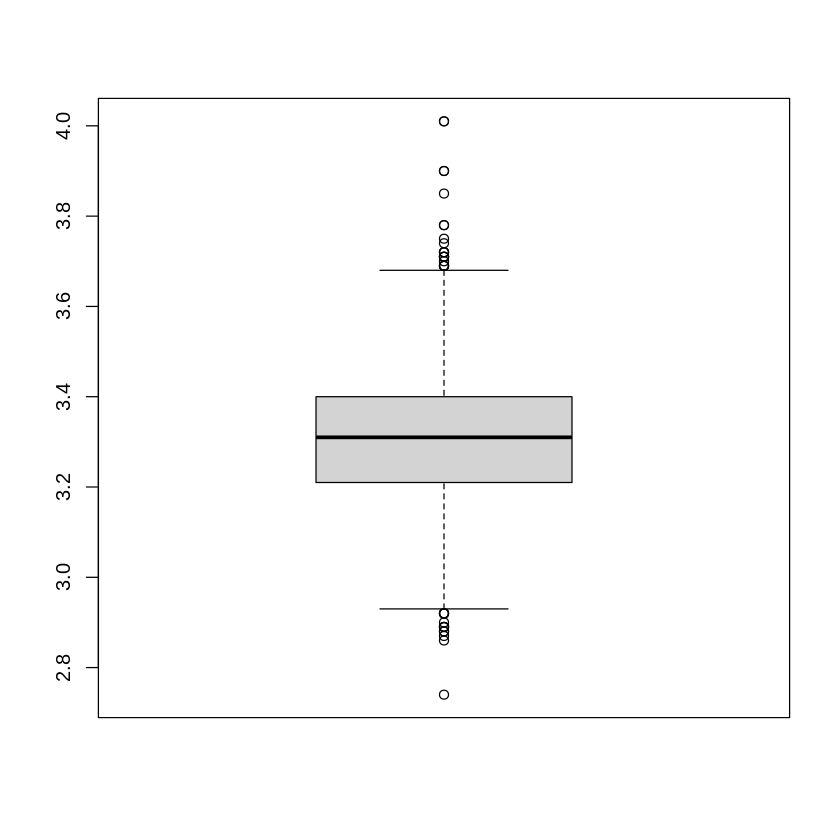

In [12]:
boxplot(data$pH)


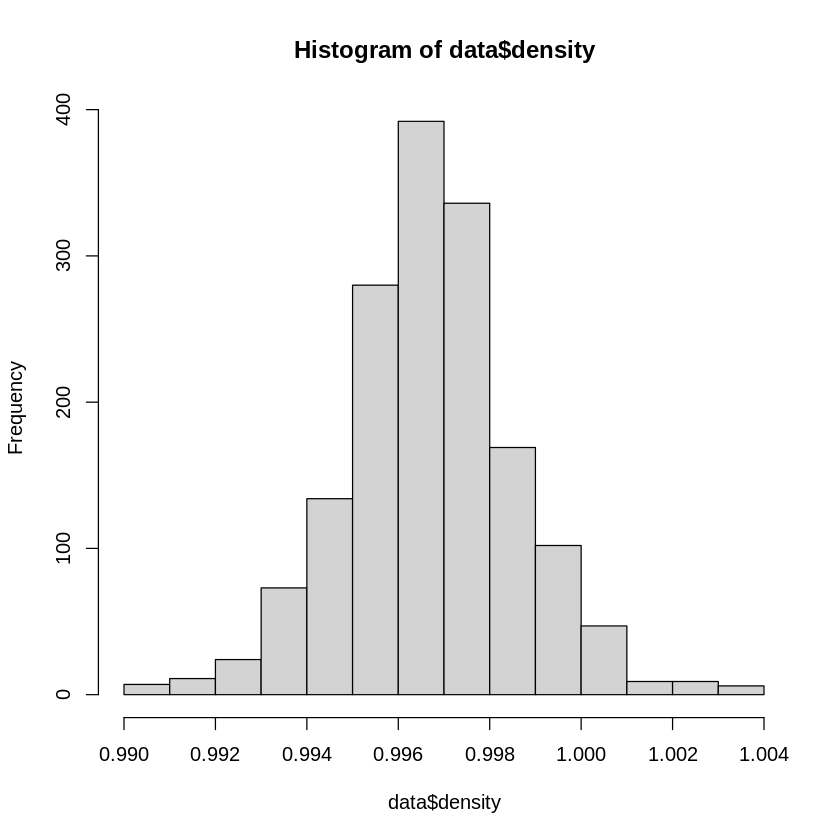

In [14]:
hist(data$density)


In [ ]:
head(data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [ ]:
print("---Values in quality column")
unique(data$quality)

[1] "---Values in quality column"


[1] 5 6 7 4 8 3

In [ ]:
table(data$quality)


  3   4   5   6   7   8 
 10  53 681 638 199  18 

we can see that class is skewed i.e  it has imbalance value

In [21]:
data$alcohol=as.numeric(data$alcohol)
quantile(data$alcohol)

0%  25%  50%  75% 100% 
 8.4  9.5 10.2 11.1 14.9

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


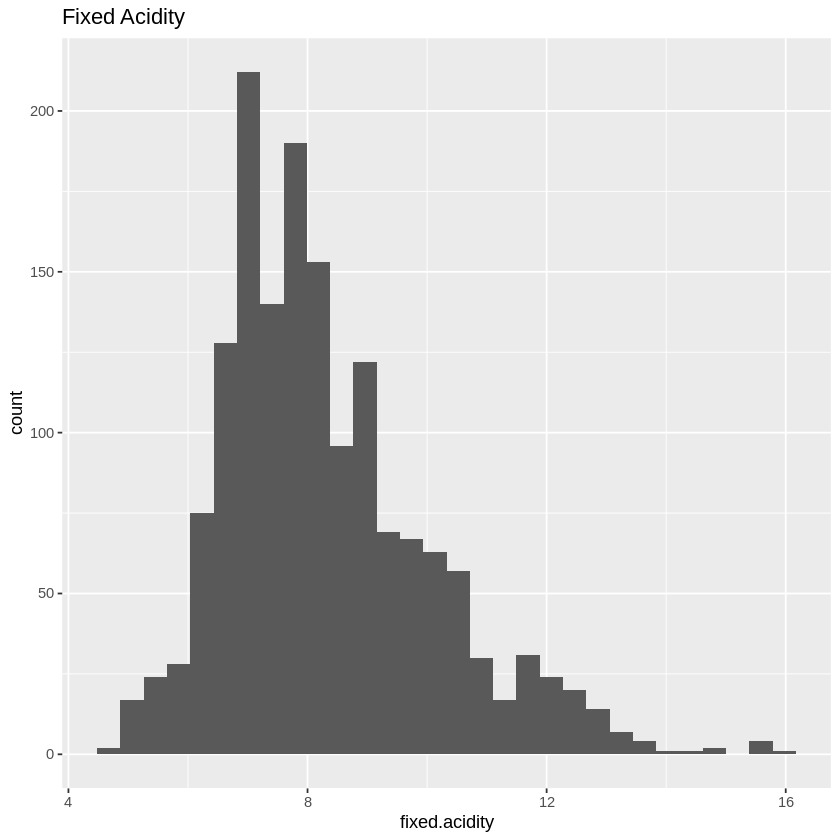

In [23]:
#fixed.acidity

ggplot(data, aes(x=fixed.acidity)) +
geom_histogram() +
labs(title="Fixed Acidity")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


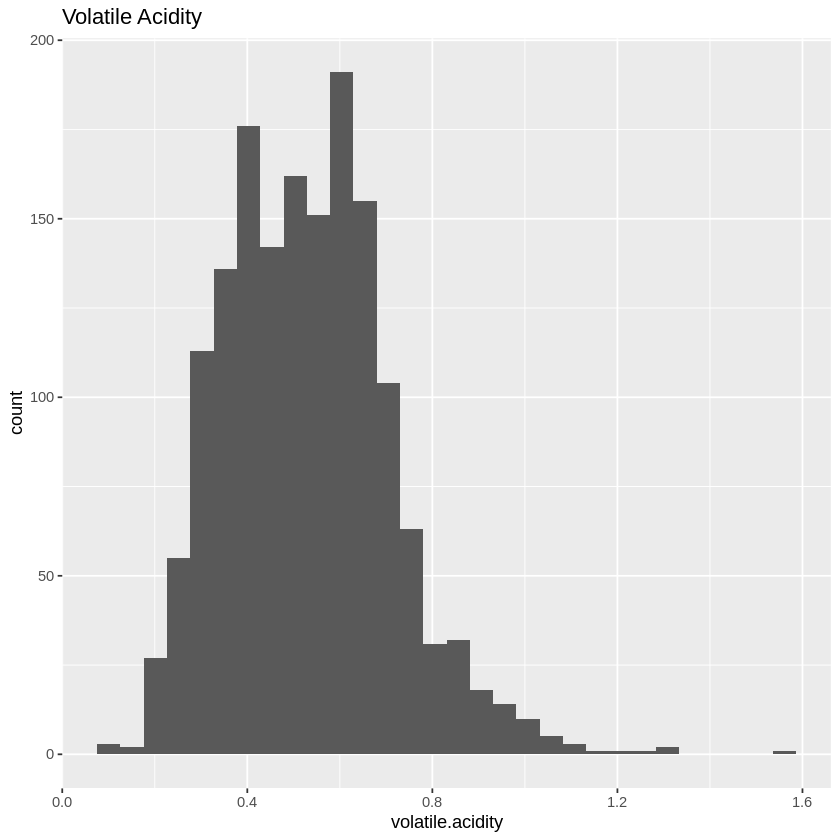

In [24]:
ggplot(data, aes(x=volatile.acidity)) +
geom_histogram() +
labs(title="Volatile Acidity")

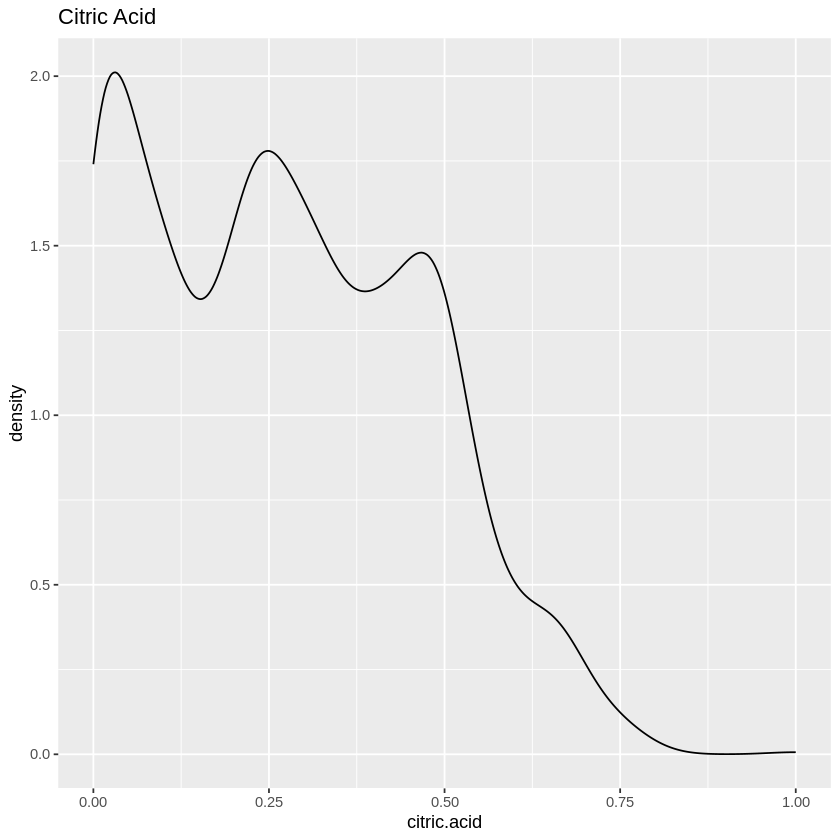

In [25]:
ggplot(data, aes(x=citric.acid)) +
geom_density() +
labs(title="Citric Acid")

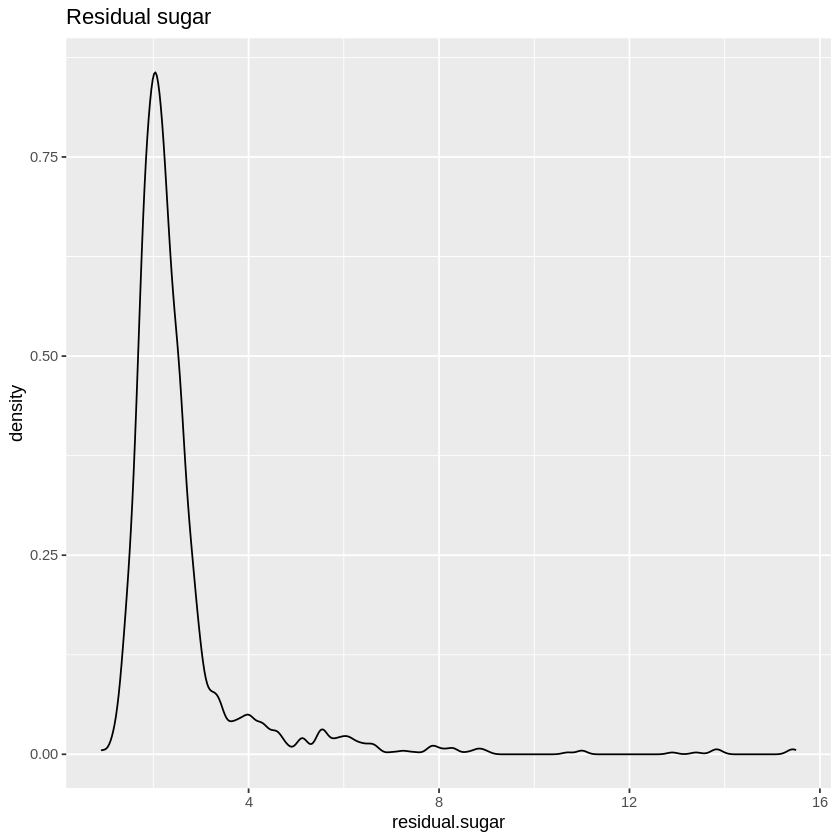

In [26]:
ggplot(data, aes(x=residual.sugar)) +
geom_density() +
labs(title="Residual sugar")

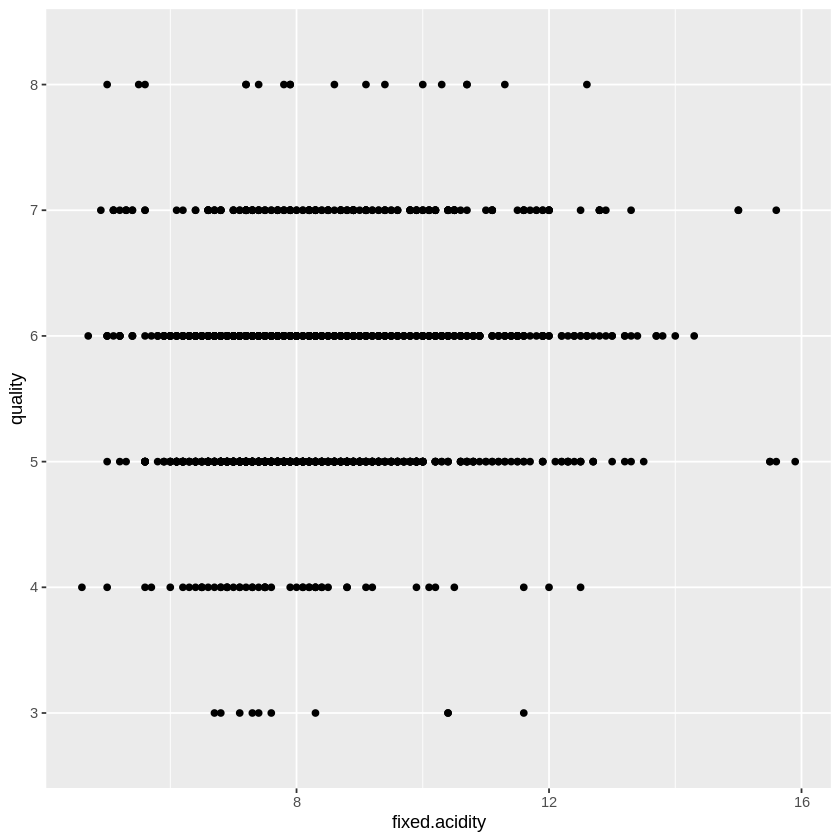

In [29]:
#bivariate analysis

#fixed.acidity vs quality

ggplot(data, aes(x=fixed.acidity, y=quality))+
geom_point()

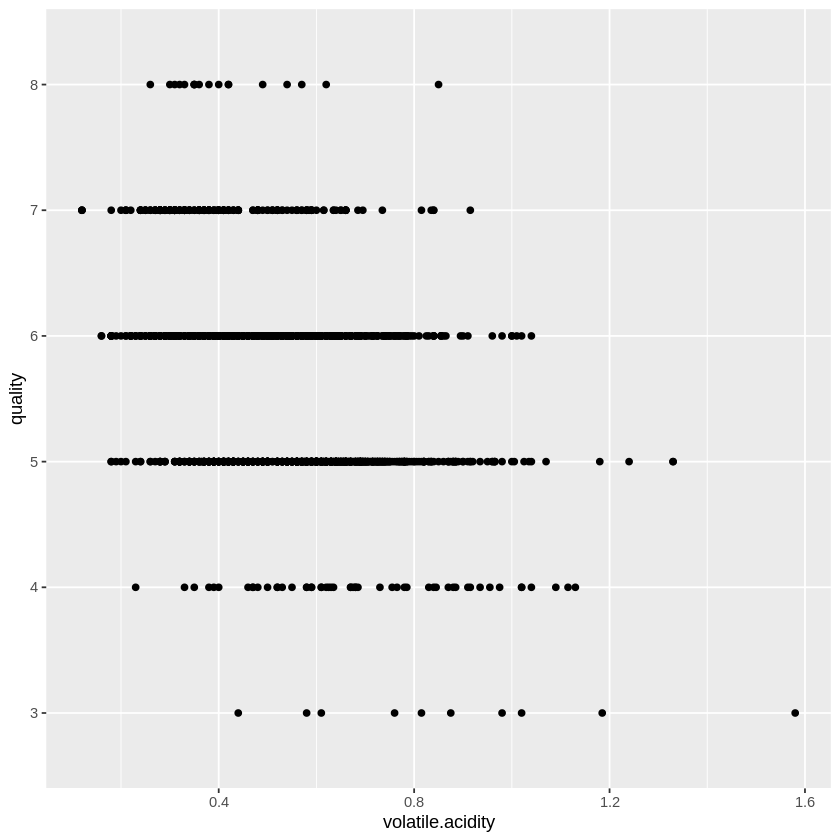

In [30]:
#volatile.acidity vs quality

ggplot(data, aes(x=volatile.acidity, y=quality))+
geom_point()

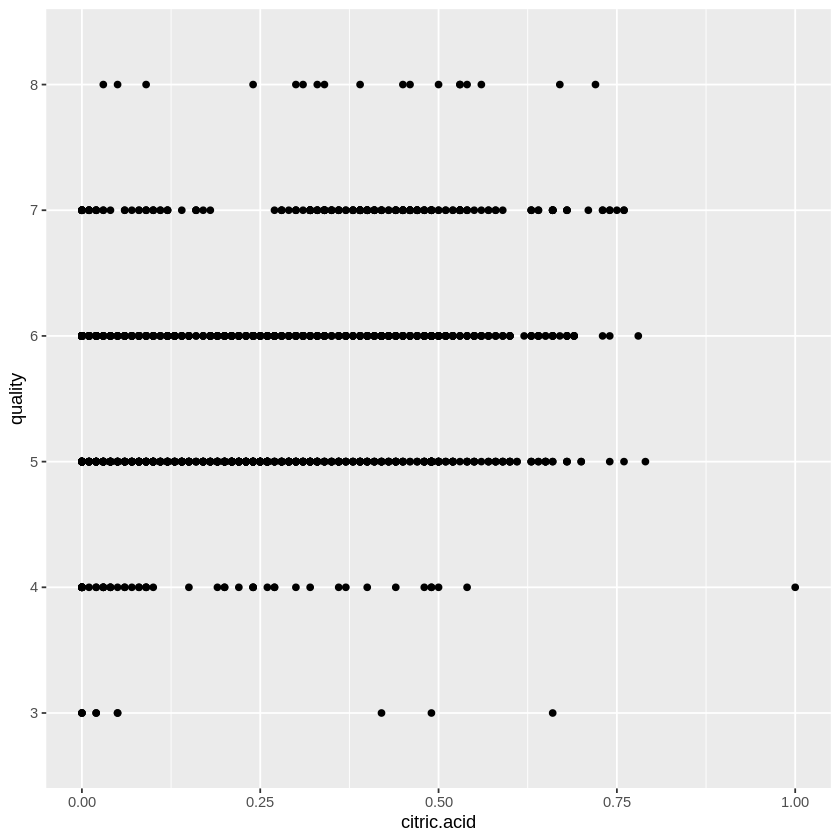

In [31]:
#citric.acidity vs quality

ggplot(data, aes(x=citric.acid, y=quality))+
geom_point()

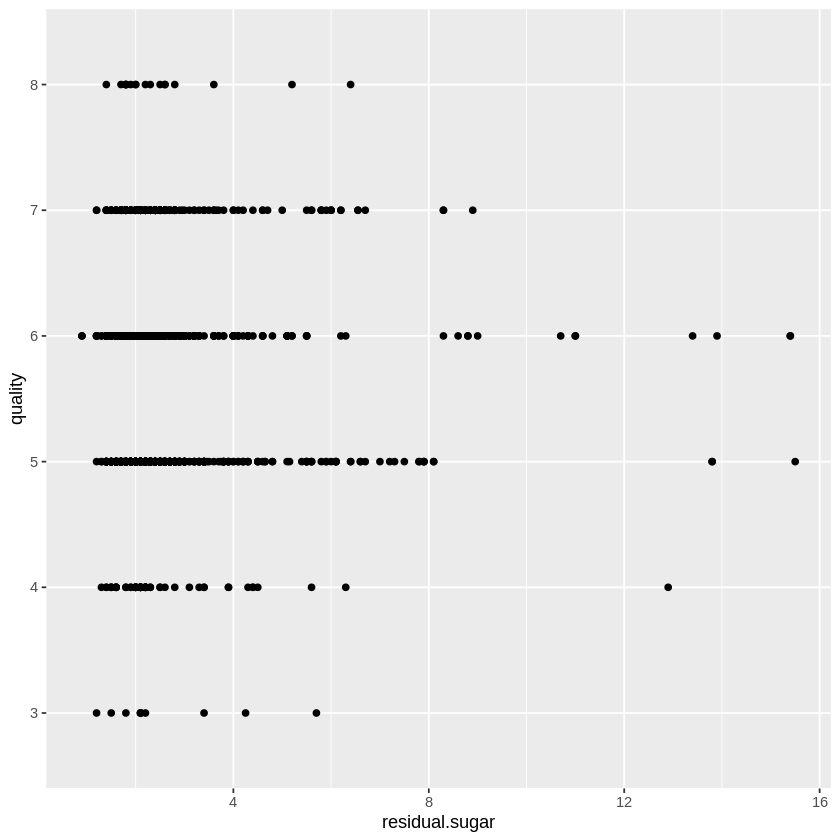

In [32]:
#fixed.acidity vs quality

ggplot(data, aes(x=residual.sugar, y=quality))+
geom_point()

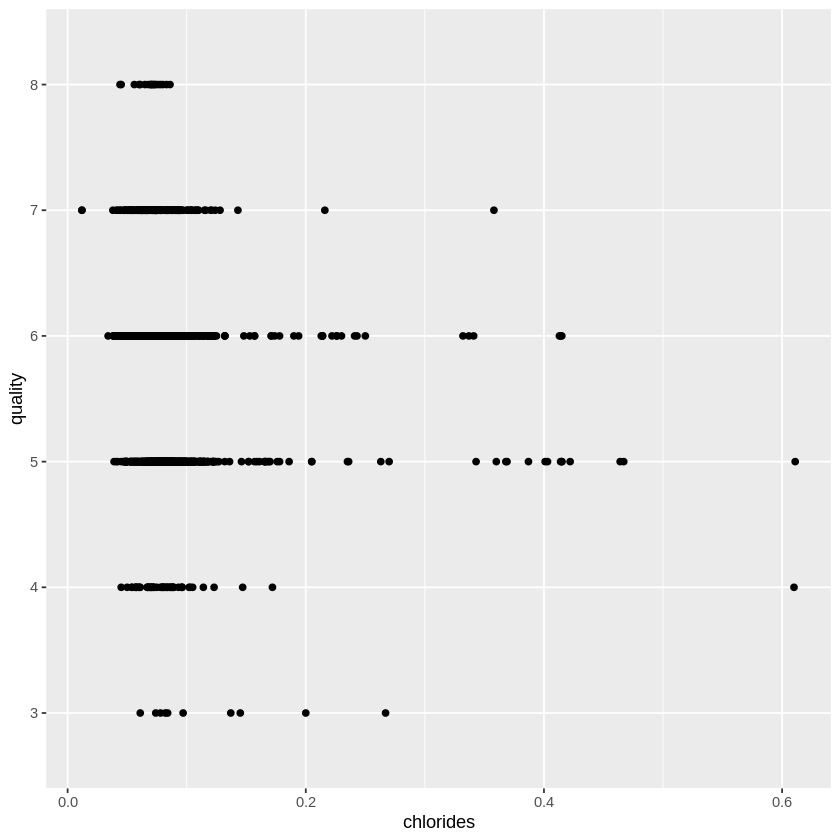

In [33]:
#chlorides vs quality

ggplot(data, aes(x=chlorides, y=quality))+
geom_point()

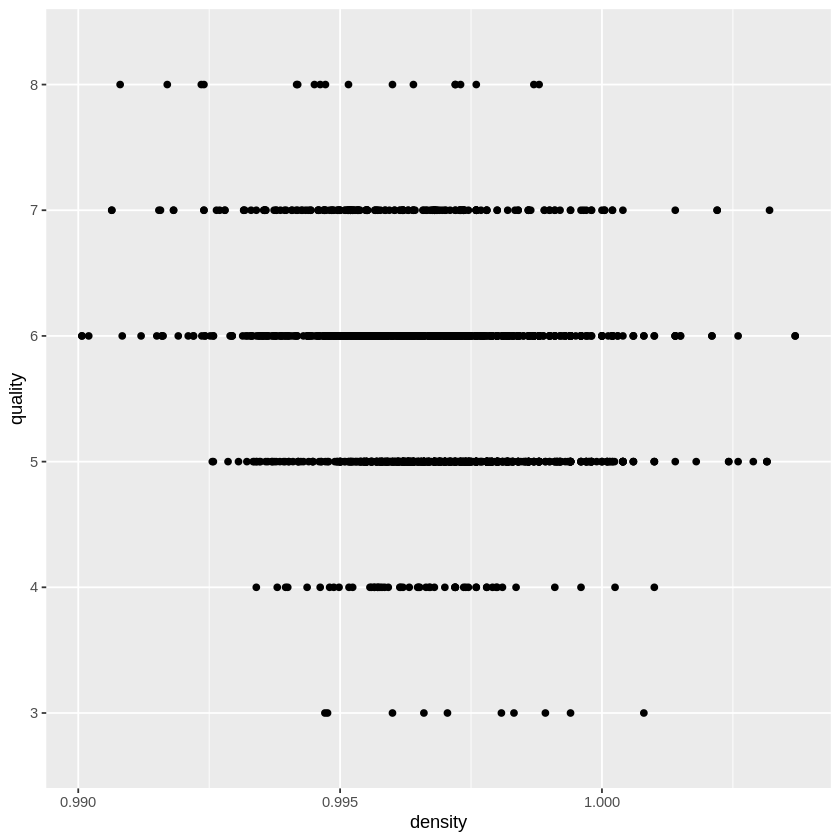

In [36]:
#density vs quality

ggplot(data, aes(x=density, y=quality))+
geom_point()

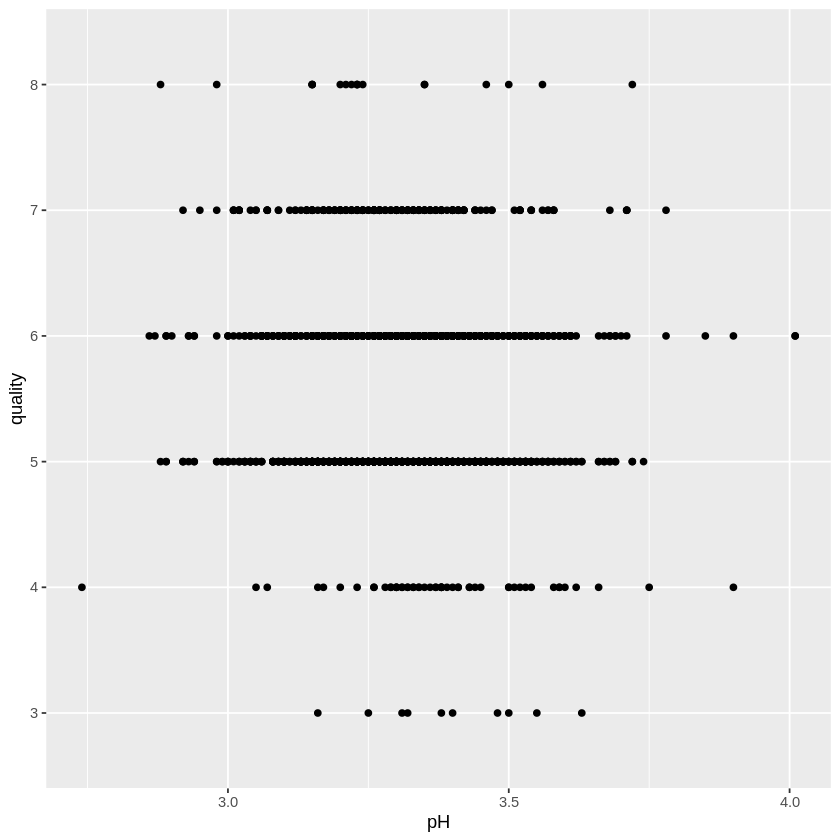

In [37]:
#pH vs quality

ggplot(data, aes(x=pH, y=quality))+
geom_point()